In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

womandata = pd.read_csv("C:/BigData/work/R_Project/ch011/woman_households.csv", encoding="euc-kr")
# 위에서는 r로 시작하는 원시(raw) 문자열을 사용한 것에 유의하세요.
womandata
# csv 파일을 pandas의 데이터 프레임으로 불러오려면 pd.read_csv()

In [ ]:
womandata.notnull().sum()

In [ ]:
womandata.rename(columns = {'주택(거처)의 종류.1':'단독주택', '주택(거처)의 종류.2':'아파트',
                            '주택(거처)의 종류.3':'연립주택', '주택(거처)의 종류.4':'다세대주택',
                            '주택(거처)의 종류.5':'비거주용 건물내 주택'
                            }, inplace=True) # 보기 힘드니까 열 이름들을 제대로 바꿔줌 (csv로 바꾸면서 틀어진거)
womandata

In [23]:
womandata = womandata.loc[womandata["성별"]=="여자", ["자치구", "성별", "합계", "단독주택", "아파트", "연립주택",
                                      "다세대주택", "비거주용 건물내 주택", "주택이외의 거처"]]
# loc를 써서 필요한 행과 열만 추출, 행에선 여자인 행만 추출하고 열에선 필요한 열을

womandata
womandata.to_csv('실습결과.csv', index=False, encoding="euc-kr")
# 앞에 숫자가 index인데 이걸 false로 하고 저장함, encoding euc-kr로 하면 깨지지 않음

In [ ]:
womandata.insert(9,'면적', [605.23, 23.91, 9.96, 21.87, 16.86, 17.06, 14.22,
                         18.5, 24.58, 23.6, 20.65, 35.44, 29.71, 17.63, 23.85, 17.41,
                         41.44, 20.12, 13.02, 24.55, 16.35, 29.57, 46.98, 39.5, 33.87, 24.59])

# 9번째 열에 추가하기
womandata

In [ ]:
# womandata.info() # 타입확인
womandata.dtypes # 데이터프레임 타입확인

# test = womandata['합계'] / womandata['면적'] 형때문에안됨

In [ ]:
womandata['합계']= womandata['합계'].str.replace(pat=r'[^\w]',repl=r'',regex=True)
womandata['합계'] #특수문자 제거해주기

In [52]:
womandata = womandata.astype({'합계':'float64'}) # 타입 변환

In [ ]:
womandata.info()

In [ ]:
test = womandata['합계'] / womandata['면적']
# round(test,2) # 소수점 2자리까지만 출력
test = round(test)
test

In [ ]:
test = test.astype('int') # 타입 변환
test.dtypes

In [ ]:
# test = test.split("")
# print(test[1])
# 문자열일때 쪼개기

# test[0:4]
# float 때문에 .0 이 나오는 문제여서 전부 주석처리

In [56]:
# test.columns = ['면적당 1인 가구 수']
# test
# 안되어서 직접 합치고 바꿈...

# test["C"] = np.nan # 새 열 추가하고 이름 바꾸려고 했으나 행이 추가됨 ㅠㅠ..

In [ ]:
# womandata.insert(10,'면적당 1인 가구 수', [1222.18, 557.09 ,1184.44,
#                 914.54, 1287.72, 1918.58, 2157.95, 1542.54, 1394.67, 1047.75, 941.69,
#                 923.73, 1098.35, 1616.79, 1505.58, 1227.91, 1134.99, 1286.58, 1496.70, 1299.43,
#                 2065.69, 2082.11, 527.88, 1001.34, 1204.72, 1077.63])
# # 인덱스 제거하고 따로 붙여넣는 방법이 없어서 복사해서 그냥 했음

womandata = pd.concat([womandata, test], axis=1) # axis=1이 없으면 NaN 값으로 나옴
womandata

In [ ]:
womandata = womandata.rename(columns = {0:'면적당 1인 가구 수'}) 
womandata

In [ ]:
# womandata.info()  # float끼리 나눴으니 float타입

end = womandata[["자치구", "면적당 1인 가구 수"]]
end

In [ ]:
end.rename(columns = {'자치구':'District', '면적당 1인 가구 수':'Onepersonhouseholds',}, inplace=True)
# true 안붙이면 복사본이 생성됨
end

In [ ]:
end = end.drop(index=[3]) # index 3인 합계를 지움
end

In [ ]:
end = end.sort_values('District', ascending=True) # 지역이름인 ㄱㄴㄷ 순으로 정렬해줌
end

In [ ]:
end.to_csv('Oneperson.csv', index=False, encoding="euc-kr") # 변수이름 수정하기

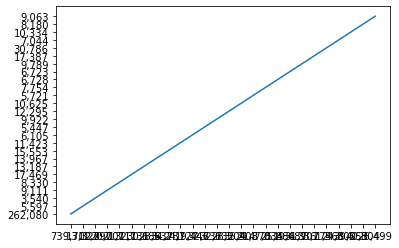

In [119]:
plt.plot(womandata['합계'], womandata['단독주택'])

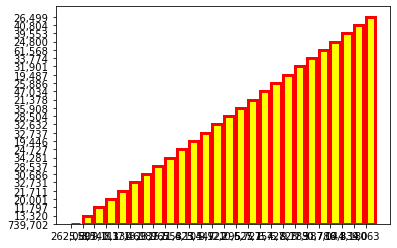

In [123]:
x = np.arange(len(womandata["단독주택"]))
plt.bar(x,womandata["합계"], color = 'yellow', align='edge', edgecolor='red', width=0.8,
        linewidth=3, tick_label=womandata["단독주택"])
plt.show()

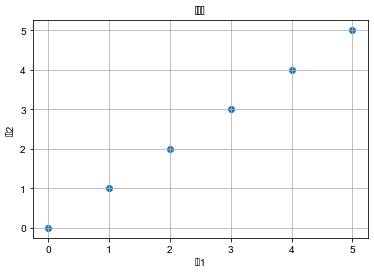

In [126]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/micross.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.scatter([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
plt.title('산점도')
plt.xlabel('변수1')
plt.ylabel('변수2')
plt.grid(True)
plt.show()
